# Conclusions of the Prosper Loan Analysis
## by Svajune Klimasauskaite

## Investigation Overview 

Prosper is one of the pioneers of peer-to-peer, or marketplace, lending, which connects good-credit borrowers with investors who can choose to fund their loans. San Francisco-based Prosper was founded in 2005 and has facilitated more than $15 billion in loans.

This presentation presents the results of how Prosper business changed over the years. The investigation was done by analysing 3 different perspectives: 
* **Loan Characteristic** investigation like: Status, Year, Term, Duration, Loan Amount and Prosper Rating.
* **Borrowers Characteristic** investigation like Employment Status, Income Range, Employment Status Duration, Stated Monthly Income, Is Borrower Homeowner, Income Verifiable.
* **Borrowers financial rating** investigation like Borrower Rate, Bankcard Utilization, Debt To Income Ratio, Credit Score Range Lower.

## Dataset Overview

The dataset includes loans and borrowers characteristics as well as financials rating information. The first year 2005 and the last one 2014, do not include all year data, however, it has enough data to see tendencies.

In [86]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [87]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("DataSet/df_presentation.csv")
df.head()

,Unnamed: 0,LoanOriginationDate,LoanOriginalAmount,LoanStatus,ProsperRating (numeric),Term,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,CreditScoreRangeLower,BankcardUtilization,DebtToIncomeRatio,Year,IncomeRange(numeric)
0,0,2007-09-12,9425,Completed,NaN,3.0,0.1580,Self-employed,0.166667,True,"$25,000-49,999",True,3083.0,640.0,0.00,0.17,2007,4
1,1,2014-03-03,10000,Current,6.0,3.0,0.0920,Employed,3.666667,False,"$50,000-74,999",True,6125.0,680.0,0.21,0.18,2014,5
2,2,2007-01-17,3001,Completed,NaN,3.0,0.2750,Not available,NaN,False,Not displayed,True,2083.0,480.0,NaN,0.06,2007,0
3,3,2012-11-01,10000,Current,6.0,3.0,0.0974,Employed,9.416667,True,"$25,000-49,999",True,2875.0,800.0,0.04,0.15,2012,4
4,4,2013-09-20,15000,Current,3.0,3.0,0.2085,Employed,3.666667,True,"$100,000+",True,9583.0,680.0,0.81,0.26,2013,7


## Big Picture

It was difficult times to start this type of business, however in the "difficulties", you can find opportunities!

The data shows that the first 4 years were challenging and risky with many defaulted and charged-off Loans, however in the year 2010 things changed... Grey clouds moved away and the sun came back. 

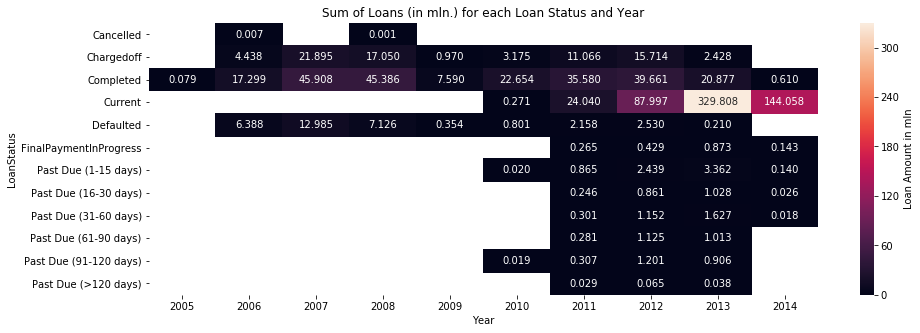

In [88]:
plt.figure(figsize = [15, 5]) 
df_set = df.groupby(['LoanStatus', 'Year']).sum()['LoanOriginalAmount']
df_set = df_set.reset_index(name = 'Number')
df_set['Number']=df_set['Number'].astype(float)/1000000
df_set = df_set.pivot(index = 'LoanStatus', columns = 'Year',
                            values = 'Number')
sb.heatmap(df_set, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Loan Amount in mln'})
plt.title('Sum of Loans (in mln.) for each Loan Status and Year');

## Loan Characteristics over Years

Prosper rating was introduced only in 2009. Data shows how Loans were differentiated across and how many years it took to get a matured differentiation schema.

Prosper rating and description:
    * 0 - N/A
    * 1 - HR 
    * 2 - E 
    * 3 - D 
    * 4 - C 
    * 5 - B 
    * 6 - A 
    * 7 - AA 

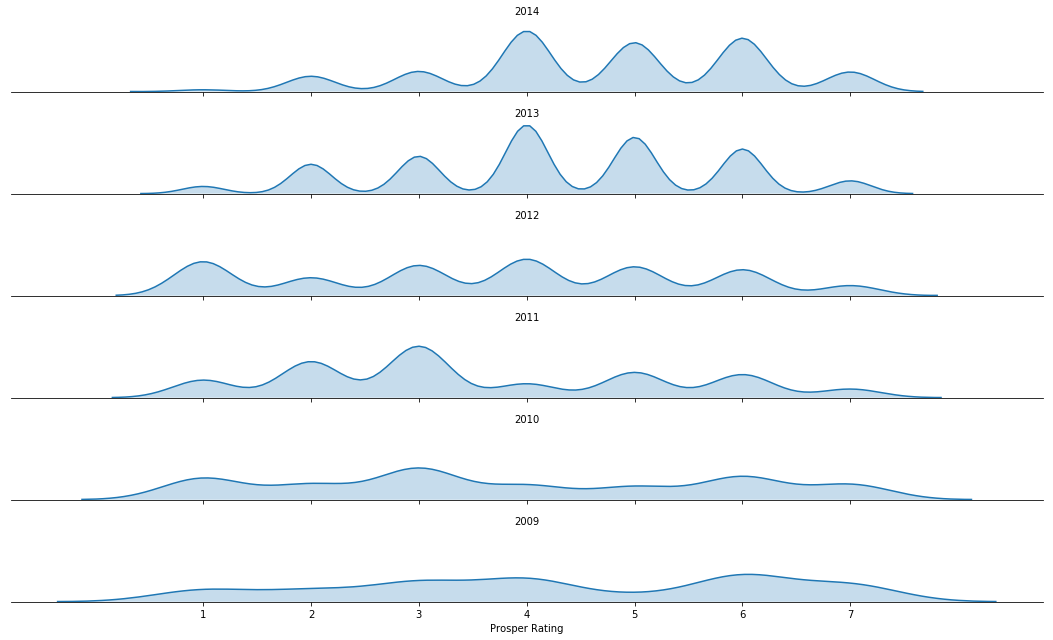

In [89]:
df_filterYear = df.query('Year>=2009')
group_means = df_filterYear.groupby(['Year']).mean()
group_order = group_means.sort_values(['Year'], ascending = False).index

g = sb.FacetGrid(data = df_filterYear, row = 'Year', height = 1.5, aspect = 10,
                 row_order = group_order);
g.map(sb.kdeplot, 'ProsperRating (numeric)', shade = True);

# remove the y-axes
g.set(yticks=[]);
g.set(xticks=[1,2,3,4,5,6,7])
g.despine(left=True);

plt.xlabel('Prosper Rating')
g.set_titles('{row_name}');

## Borrower Characteristics over Years

Borrowers with 0 income were granted for a Loan and it was valid until 2014. Though the Monthly median income was increasing gradually.


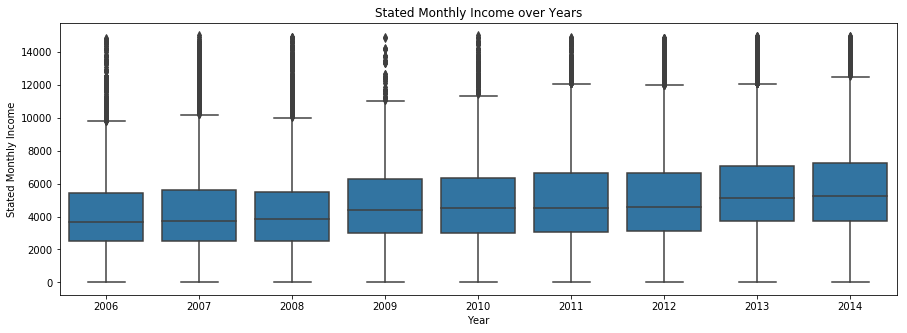

In [90]:
plt.figure(figsize = [15, 5]) 
base_color=sb.color_palette()[0]

df_scatter=df.query('StatedMonthlyIncome<15000 and Year>2005')
sb.boxplot(data = df_scatter, x = 'Year', y = 'StatedMonthlyIncome', color = base_color)
plt.title ('Stated Monthly Income over Years')
plt.xlabel('Year')
plt.ylabel('Stated Monthly Income');

## Borrowers' financial rating over Years

This visualisation presents that Dept to income ratio is one of the important parameters for the better Prosper Rating which increases chances for the better Borrower Rate. As well we can visually distinguish how it changed over the years. 

Prosper rating and description:
* 0 - N/A
* 1 - HR 
* 2 - E 
* 3 - D 
* 4 - C 
* 5 - B 
* 6 - A 
* 7 - AA 


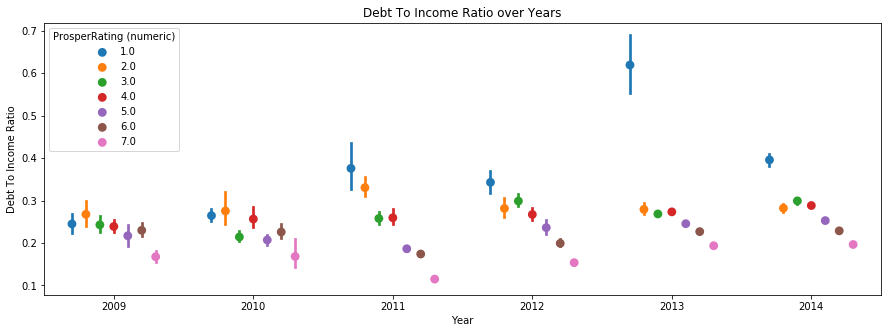

In [91]:
plt.figure(figsize = [15, 5]) 
df_year=df.query('Year>=2009')
ax = sb.pointplot(data = df_year, x = 'Year', y = 'DebtToIncomeRatio', hue = 'ProsperRating (numeric)',
                  dodge = 0.6, linestyles = "")
plt.title ('Debt To Income Ratio over Years')
plt.xlabel('Year')
plt.ylabel('Debt To Income Ratio');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!